# <center>HW5</center>
### <center>106030012 廖昱瑋</center>
***

## 讀Data
運用keras.datasets.fashion_mnist.load_data將data讀進來，並print看看train、test data各有幾個  
下面順便印出了前25個train data的圖及他們的label，可以藉此觀察到都是黑白的相片，像素為28*28

Num of train set: 60000
Num of test set: 10000
Pixel: (28, 28)

Train data example:


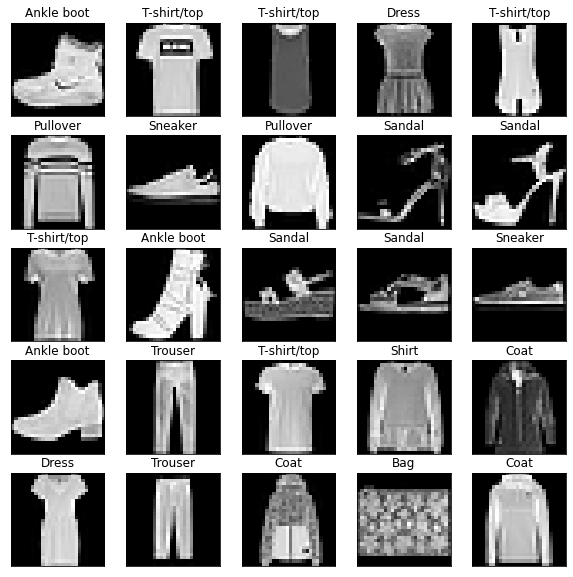

In [225]:
import numpy as np
import pandas as pd
import keras as kr
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

NUM_CLASSES=10
CLASS_NAMES = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

print("Num of train set:", len(x_train))
print("Num of test set:", len(x_test))
print("Pixel:",x_train[0].shape)


print("\nTrain data example:")
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))        
    label_index = int(y_train[i])
    plt.title(CLASS_NAMES[label_index])
plt.show()

## 資料預處理
1. feature的shape從28*28 flatten成784
2. feature裡element值範圍為0~255，將它除以255做normalized

In [226]:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

x_train = (x_train.astype(np.float32))/255
x_test = (x_test.astype(np.float32))/255

ds_train_x = tf.data.Dataset.from_tensor_slices(x_train)
ds_train_y = tf.data.Dataset.from_tensor_slices(y_train)
    
ds_train_orig = tf.data.Dataset.zip((ds_train_x, ds_train_y))

## 建立model
這次model我選用了上課第11章教的multilayer perceptron做訓練，multilayer代表hidden layer只有一層，而mlp為fully connected，所以在keras裡用Dense  
最開始宣告model時，可以動的變數有node數及activation function  

### hidden layer
1. node數： 因為每個sample各有784個features，數量很多，此model又是fully connected，怕training時會花太多時間得不到結果，所以我的node數先試key一個較小的數16  
2. activation function: 這次訓練的data為圖片，features之間極有可能為nonliner分布，所以activation function我選用sigmoid function，家了一些nonlinear的特性進去，預期結果應該會比使用linear funtion來的好

### output layer
1. node數： 即為label種類，label共有10種，所以設10個nodes
2. activation function： 這邊選用softmax，它可以看個別class的probability，而不是直接給index

In [228]:
mlp_model = kr.models.Sequential()
mlp_model.add(kr.layers.Dense(16, activation="sigmoid" , input_shape=(784,)))
mlp_model.add(kr.layers.Dense(10,activation="softmax"))

mlp_model.summary()

mlp_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


由model的summary我們可以看到共有12730個weights需要train  
* input, hidden layer之間： (784+1)*16 = 12560個weights
* hidden, output layer之間： (16+1)*10 = 170個weights

## 訓練model
接著使用fit訓練看看剛剛宣告的model，在fit裡面我設定的參數有以下幾個  
1. suffle： 設定為True，開啟shuffle讓每次train model可以看到不同順序的data，增加隨機性
2. epochs： 因為會拿所有60000筆samples下去train，data資料很足夠，所以就先train 100個epochs就好，如果accuracy不夠在增加epochs數
3. batch_size： 總共有60000筆samples，若不設batch_size，會造成很久才調整一次weight，訓練效果一定不好，所以這邊設定batch_size為一個適當的數字200
4. validation_split： 分割一部分的training data變成validation data，因為training data數目非常多，所以只需要分25%到validtion就很足夠了，不用到30%

In [229]:
history = mlp_model.fit(x_train, y_train, shuffle=True, epochs=100, 
                        batch_size = 200, validation_split=0.25, 
                        verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 2s 53us/step - loss: 1.4942 - accuracy: 0.6062 - val_loss: 1.1028 - val_accuracy: 0.7254
Epoch 2/100
45000/45000 [==============================] - 2s 48us/step - loss: 0.9389 - accuracy: 0.7520 - val_loss: 0.8088 - val_accuracy: 0.7779
Epoch 3/100
45000/45000 [==============================] - 2s 47us/step - loss: 0.7275 - accuracy: 0.7920 - val_loss: 0.6632 - val_accuracy: 0.8037
Epoch 4/100
45000/45000 [==============================] - 2s 51us/step - loss: 0.6183 - accuracy: 0.8155 - val_loss: 0.5852 - val_accuracy: 0.8202
Epoch 5/100
45000/45000 [==============================] - 2s 48us/step - loss: 0.5541 - accuracy: 0.8275 - val_loss: 0.5349 - val_accuracy: 0.8271
Epoch 6/100
45000/45000 [==============================] - 2s 47us/step - loss: 0.5128 - accuracy: 0.8358 - val_loss: 0.5044 - val_accuracy: 0.8341
Epoch 7/100
45000/45000 [==============================] - 2s 

Epoch 56/100
45000/45000 [==============================] - 2s 46us/step - loss: 0.2924 - accuracy: 0.8976 - val_loss: 0.3641 - val_accuracy: 0.8723
Epoch 57/100
45000/45000 [==============================] - 2s 45us/step - loss: 0.2912 - accuracy: 0.8971 - val_loss: 0.3640 - val_accuracy: 0.8725
Epoch 58/100
45000/45000 [==============================] - 2s 45us/step - loss: 0.2894 - accuracy: 0.8976 - val_loss: 0.3646 - val_accuracy: 0.8731
Epoch 59/100
45000/45000 [==============================] - 2s 45us/step - loss: 0.2883 - accuracy: 0.8978 - val_loss: 0.3623 - val_accuracy: 0.8741
Epoch 60/100
45000/45000 [==============================] - 2s 46us/step - loss: 0.2877 - accuracy: 0.8984 - val_loss: 0.3657 - val_accuracy: 0.8729
Epoch 61/100
45000/45000 [==============================] - 2s 46us/step - loss: 0.2865 - accuracy: 0.8985 - val_loss: 0.3657 - val_accuracy: 0.8711
Epoch 62/100
45000/45000 [==============================] - 2s 45us/step - loss: 0.2864 - accuracy: 0.8992

在最後一個epoch training accuracy為90.95%，validation accuracy為87.29%

接著，我將training過程的loss跟accuracy畫成趨勢圖，看看在epoch增加時loss跟accuracy的變化

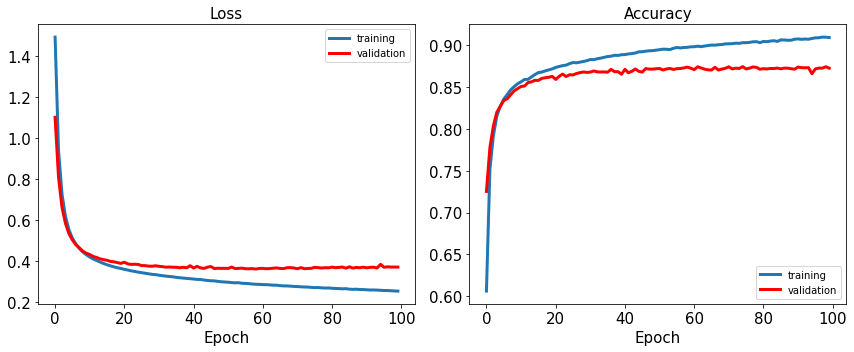

In [230]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3, label="training")
ax.plot(hist['val_loss'], 'r', lw=3, label="validation")
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="upper right")

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3, label="training")
ax.plot(hist['val_accuracy'], 'r', lw=3, label="validation")
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.legend(loc="lower right")

plt.show()

由上面兩張圖可以看出以下結論
1. 大約在前40個epochs，training及validation loss急速下降，accuracy急速上升，之後就趨於平緩
2. 在40~100 epochs間，training的accuracy緩緩上升，而loss則緩緩下降
3. 但在40~100 epochs間，validation的accuracy及loss則呈現動態平衡的樣子，accuracy一直在87%左右震盪
從以上幾點可以發現，在30個epochs以後，model有over-fitting的現象，所以先前擔心的epochs數不足不但沒有發生，反而還太多

## 重新建立及train model
這次降低train model的epochs數到40，以防造成over-fitting。因為validation accuracy還不錯，其他參數就不變動了

In [231]:
mlp_model = kr.models.Sequential()
mlp_model.add(kr.layers.Dense(16, activation="sigmoid" , input_shape=(784,)))
mlp_model.add(kr.layers.Dense(10, activation="softmax"))

mlp_model.summary()

mlp_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history = mlp_model.fit(x_train, y_train, shuffle=True, epochs=40, 
                        batch_size = 200, validation_split=0.25, 
                        verbose=1)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Train on 45000 samples, validate on 15000 samples
Epoch 1/40
45000/45000 [==============================] - 2s 52us/step - loss: 1.5371 - accuracy: 0.5714 - val_loss: 1.1313 - val_accuracy: 0.6869
Epoch 2/40
45000/45000 [==============================] - 2s 44us/step - loss: 0.9638 - accuracy: 0.7434 - val_loss: 0.8329 - val_accuracy: 0.7725
Epoch 3/40
45000/45000 [==============================] - 2s 44us/step - loss: 0.7572 - accuracy: 0.7910 - val_loss: 0.6913 - val_accuracy: 0.8010
Epoch 4/40
45000/450

在最後一個epoch training accuracy為88.97%，validation accuracy為86.83%  
training accuracy較上一個model下降，而validation accuracy則保持差不多  
這時training及validation accuracy較接近，比較沒有overfitting現象

接著，再將training過程的loss跟accuracy畫成趨勢圖，看看在epoch增加時loss跟accuracy的變化

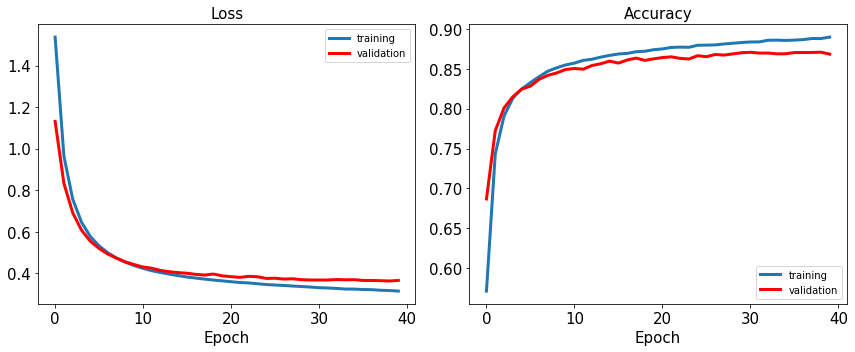

In [232]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3, label="training")
ax.plot(hist['val_loss'], 'r', lw=3, label="validation")
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="upper right")

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3, label="training")
ax.plot(hist['val_accuracy'], 'r', lw=3, label="validation")
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.legend(loc="lower right")

plt.show()

## Prediction
最後再放test data做prediction

In [233]:
results = mlp_model.evaluate(x_test, y_test, batch_size=200, verbose=1)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

10000/10000 [==============================] - 0s 26us/step
Test loss: 0.3978   Test Acc.: 0.8590


test accuracy為85.90%，accuracy跟training及validation accuracy十分接近，表現還算不錯

### confusion matrix
接著，我畫confusion matrix從中看看predict的分布如何，觀察哪些分類為容易predict錯的

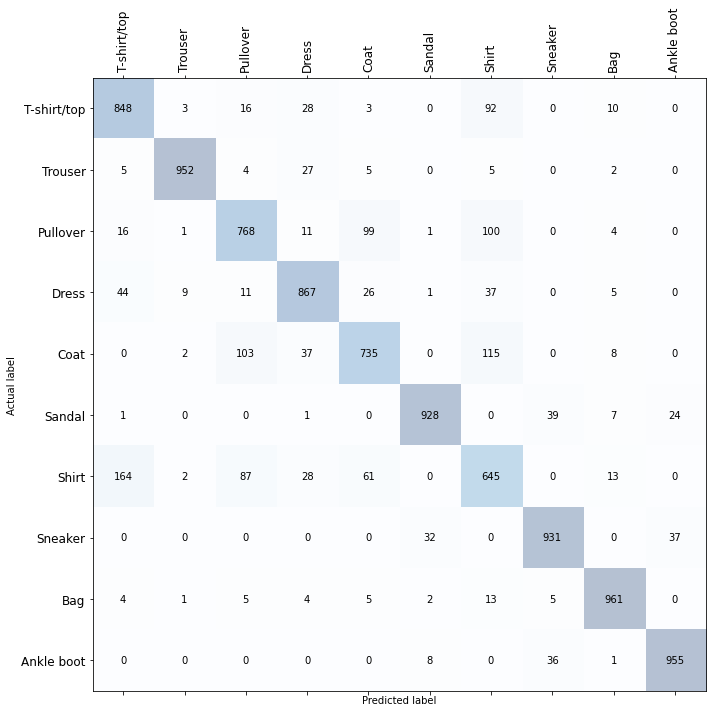

In [234]:
from sklearn.metrics import confusion_matrix

y_pred = mlp_model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.xticks(np.arange(10) ,CLASS_NAMES, rotation=90, fontsize=12)
plt.yticks(np.arange(10), CLASS_NAMES, fontsize=12)

plt.tight_layout()
plt.show()

從上圖可以觀察出以下幾點
1. 原本label為Shirt的data最容易被predict錯誤，且大多數被predict成T-shirt或pullover，這其實滿合理的，因為在黑白又像素只有28*28的粗糙照片，用人眼有時也很難分辨這幾類
2. 若把上衣類(e.g, T-shirt, pullover, coat, etc.)及鞋子類(e.g., sneaker, sandal, etc.)分開來看，其實這個model accuracy還滿高，幾乎不會跨類別
3. pullover跟coat之間也很容易predict錯，因為他們都是上衣類型且都為長袖

## Saving trained model
把train好的model包括架構及參數都存起來

In [236]:
mlp_model.save('fashion_mnist_classifier.h5', 
                overwrite=True,
                include_optimizer=True)

## Conclusion
model accuracy: 

training | validation |  test
-------- | ---------- | ------
88.97%   | 86.83%     | 85.90%

1. 三種accuracy表現都還不錯，皆有85%以上，代表前面將epochs數降低是正確的決定，它並沒有造成test accuracy不好的現象
2. 從confusion matrix可以看出Shirt v.s. (T-shirt, pullover)及pullover v.s. coat為最容易predict錯的組合。在現實狀態下，這些組合也長得滿接近的，所以部分predict錯誤滿合理  
3. 這次model需要train的weight數有12,730個，每個epoch train 45000個samples，validate 15000個samples。每個epoch在我的電腦需要花大約2秒鐘計算，train 40個epochs，在fit model時共要花大約80秒